In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [2]:
df = pd.read_csv("data/orders.csv")
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


In [3]:
grouped1 = df[["order_id"]].groupby(by=[df["order_dow"],df["order_hour_of_day"]])
df_temp = grouped1.count()
df_temp

order_id
order_dow order_hour_of_day          
0         0                      3936
          1                      2398
          2                      1409
          3                       963
          4                       813
...                               ...
6         19                    18346
          20                    13392
          21                    10501
          22                     8532
          23                     6087

[168 rows x 1 columns]

In [4]:
df_distribution = pd.DataFrame(np.arange(7*24).reshape((7,24)))
for i in range(0, 7):
    for j in range(0, 24):
        df_distribution.iloc[i][j] = df_temp.iloc[i*24+j,0]
df_distribution

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


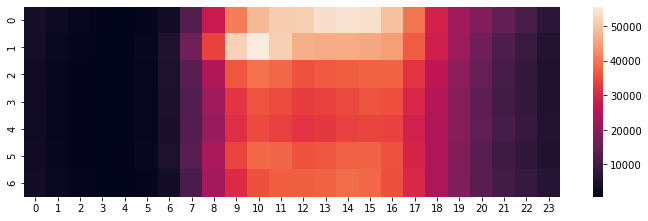

In [5]:
# plot
# ref.https://seaborn.pydata.org/generated/seaborn.heatmap.html
# ref.https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
fig, ax = pyplot.subplots(figsize=(12,3.5))
sns.heatmap(ax=ax, data=df_distribution)